In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pyproj
import osmnx
from geopy import distance
import seaborn as sns
import kagglehub

/home/kaarentenson/PythonV/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Linux
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
!mv {path} .

100%|██████████████████████████████████████████████████████| 653M/653M [07:59<00:00, 1.43MB/s]

Extracting files...


mv: stat 'path' ei õnnestu: No such file or directory


In [ ]:
#Windows
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
!move {path} .

In [3]:
filename="13/US_Accidents_March23.csv"

In [8]:
chunksize = 10 ** 6
locationCounts={}
DaytonDf=pd.DataFrame()
for chunk in pd.read_csv(filename, chunksize=chunksize):
    # chunk is a DataFrame. To "process" the rows in the chunk:
    if(DaytonDf.empty):
        DaytonDf=chunk[chunk["City"]=="Dayton"]
    else:
        DaytonDf=pd.concat([DaytonDf, chunk[chunk["City"]=="Dayton"]])

In [10]:
DaytonDf.to_csv("13/Dayton")

In [38]:
deathDf=DaytonDf[DaytonDf["Description"].str.contains("35")]

In [39]:
deathDf["Description"]

0          Right lane blocked due to accident on I-70 Eas...
3          Accident on I-75 Southbound at Exits 52 52B US...
16         Accident on James H McGee Blvd at US-35. Expec...
58         Accident on US-35 Eastbound at Steve Whalen Bl...
59         Accident on US-35 Eastbound at Smithville Rd. ...
                                 ...                        
7652368    Between Fairfield Rd and OH-835/Research Blvd/...
7652409    Closed at US-35/Exit 13 - Road closed due to a...
7652414    Between Indian Ripple Rd/Exit 10 and US-35/Exi...
7665546    At US-35/Albany St/Exit 52 - Accident. Two lan...
7713777      Between OH-835/Woodman Dr and I-675 - Accident.
Name: Description, Length: 2125, dtype: object

In [4]:
DaytonDf=pd.read_csv("13/Dayton.csv")

In [5]:
DaytonDf

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2,4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
3,6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24567,7719887,A-7769255,Source1,2,2019-08-05 20:21:34,2019-08-06 00:21:34,45.237050,-123.064840,45.236291,-123.066924,...,False,False,False,False,False,False,Day,Day,Day,Day
24568,7720723,A-7770091,Source1,4,2019-08-07 12:37:40,2019-08-07 13:06:36,29.831010,-94.798850,29.829340,-94.810860,...,False,False,False,False,False,False,Day,Day,Day,Day
24569,7721659,A-7771027,Source1,2,2019-08-08 06:33:49,2019-08-08 10:33:49,45.100861,-123.096511,45.099177,-123.094386,...,False,False,False,False,False,False,Day,Day,Day,Day
24570,7724746,A-7774114,Source1,2,2019-08-15 17:15:57,2019-08-15 21:15:56,45.244333,-123.049250,45.243778,-123.050443,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
daytonRoad=osmnx.graph_from_place(network_type="drive", query="Dayton")

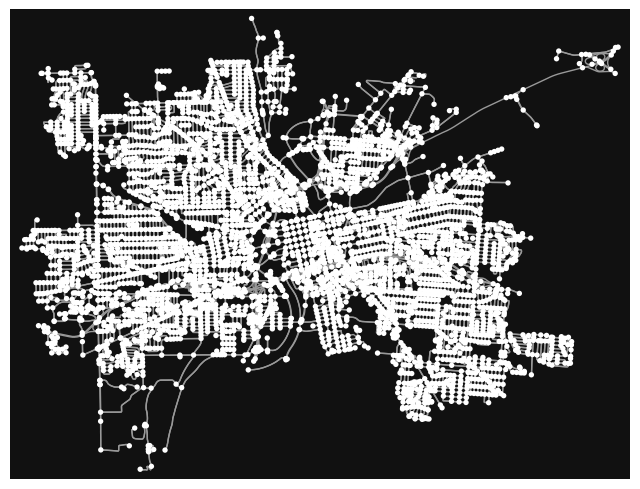

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
osmnx.plot_graph(daytonRoad)

In [9]:
osmnx.io.save_graphml(daytonRoad)